<a href="https://colab.research.google.com/github/andrew6072/mephi-numerical-methods/blob/main/power_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def generateMatrix(n, h, x, f):
    A = np.zeros((n-1, n-1))
    for i in range(0, n - 1):
        A[i, i] = f(x[i + 1]) + 2 / h ** 2
        if (i + 1 < n - 1):
            A[i, i + 1] = -1 / h ** 2
            A[i + 1, i] = -1 / h ** 2
    return A


def power_iteration(A, num_iterations: int, alpha):
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_iterations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)

        if np.linalg.norm(b_k1 - b_k) < alpha:
            break

        # re normalize the vector
        b_k = b_k1 / b_k1_norm

    lambda_k = np.dot(b_k, np.dot(A, b_k)) / np.dot(b_k, b_k)

    return b_k, lambda_k


def Rayleigh(A, num_iterations: int, alpha, mu0):
    n = A.shape[1]

    b_k = np.random.rand(A.shape[1])

    mu = mu0

    for _ in range(num_iterations):
        b_k1 = np.linalg.solve(A - mu * np.eye(n), b_k)

        b_k1_norm = np.linalg.norm(b_k1)

        if np.linalg.norm(b_k1 - b_k) < alpha:
            break

        b_k = b_k1 / b_k1_norm

        mu = np.dot(b_k, np.dot(A, b_k)) / np.dot(b_k, b_k)

    return b_k, mu

In [ ]:
# Initial data
n = 101 # number of points
l = 1
h = l / (n - 1)
x = np.linspace(0, l, num=n)
A = generateMatrix(n-1, h, x, (lambda x: x**2 + 2*x))

Lambda_0 caculated in 10000.0 iterations: 11.141592904520468


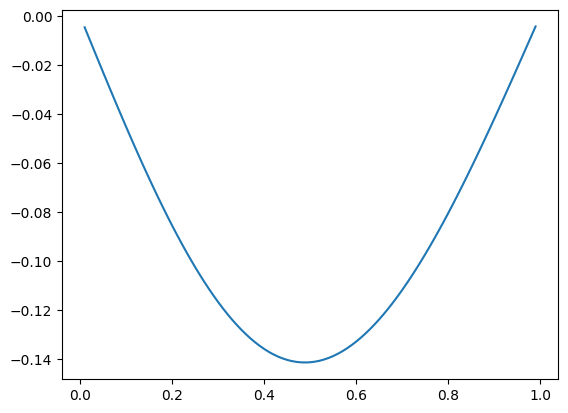

In [ ]:
num_iteration = 10e3
num_lambda = 0
b_k, lambda_n = Rayleigh(A, int(num_iteration), 10e-6, ((np.pi * num_lambda)  / l) ** 2 )
print(f"Lambda_{num_lambda} caculated in {num_iteration} iterations: {lambda_n}")
plt.plot(x[1:-1], b_k)

Lambda_1 caculated in 10000.0 iterations: 11.141592904520468


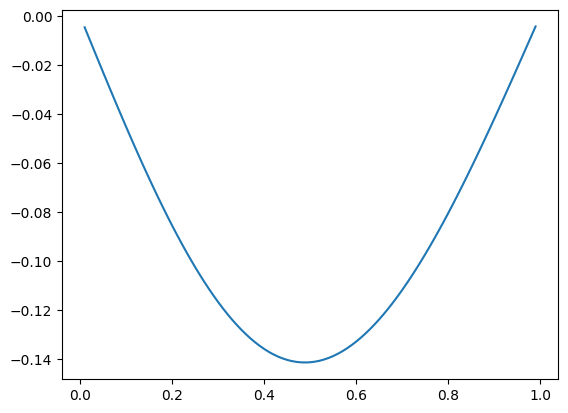

In [ ]:
num_iteration = 10e3
num_lambda = 1
b_k, lambda_n = Rayleigh(A, int(num_iteration), 10e-6, ((np.pi * num_lambda)  / l) ** 2 )
print(f"Lambda_{num_lambda} caculated in {num_iteration} iterations: {lambda_n}")
plt.plot(x[1:-1], b_k)

In [ ]:
def draw_first_n_mu(num_mu:int, num_points:int, l, func):
    n = num_points
    h = l / (n - 1)
    x = np.linspace(0, l, num=n)
    A = generateMatrix(n-1, h, x, func)
    num_iteration = 10e3
    alpha = 10e-6

    for i in range(num_mu):
        b_k, lambda_n = Rayleigh(A, int(num_iteration), alpha, ((np.pi * i)  / l) ** 2)
        plt.plot(x[1:-1], b_k, label=f"mu{i}")
        plt.legend()

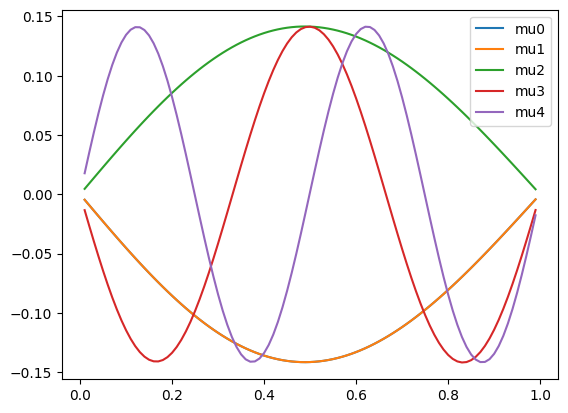

In [ ]:
draw_first_n_mu(5, 101, 1, (lambda x: x**2 + 2*x))

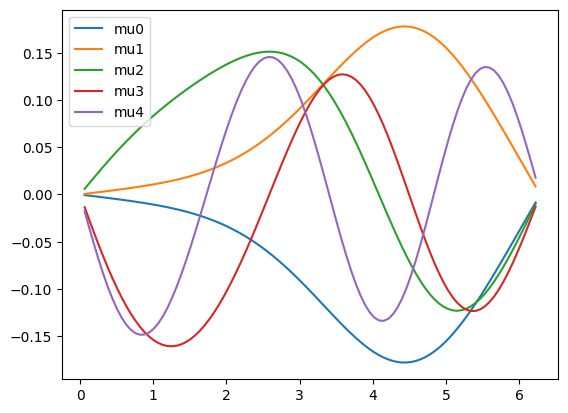

In [ ]:
draw_first_n_mu(5, 101, 2 * np.pi, (lambda x: np.sin(x)))

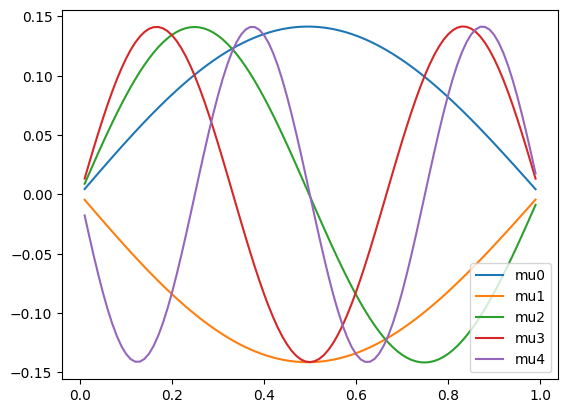

In [ ]:
draw_first_n_mu(5, 101, 1, (lambda x: np.tan(x)))

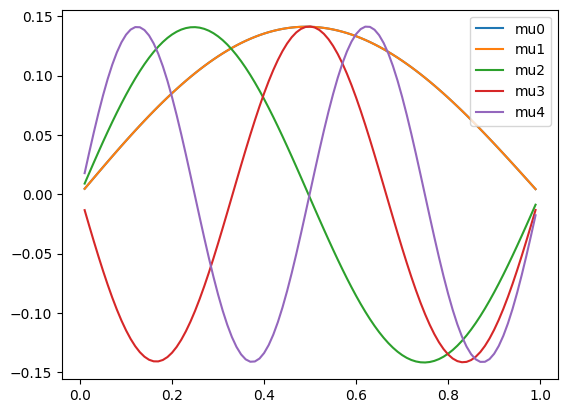

In [ ]:
draw_first_n_mu(5, 101, 1, (lambda x: np.log(x)))